In [119]:
# Approach 1:

#CLEAN -> re, stopwords, pandas
import pandas as pd                             #Load data
import re                                       #character processing & punctuation
import nltk                                     # MUST import this before nltk.download()
import matplotlib.pyplot as plt
from nltk.corpus import stopwords               #Stopwords
nltk.download('stopwords')

# TOKEN → word_tokenize
from nltk.tokenize import word_tokenize         #Tokenize
nltk.download('punkt')

# REDUCE → stemming / lemmatization
# Stemming:                                     #Stemming
from nltk.stem import PorterStemmer

# Lemmatization:                                #Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# COUNT → n-grams, pandas                       #N-grams
# import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
# Approach 2: Optimize more, Shorten it

import pandas as pd                             #Load data
import re                                       #character processing & punctuation
import nltk                                     # MUST import this before nltk.download()

from nltk.corpus import stopwords               #Stopwords
from nltk.tokenize import word_tokenize         #Tokenize
from nltk.stem import PorterStemmer             #Stemming
from nltk.stem import WordNetLemmatizer         #Lemmatization

nltk.download(['stopwords','punkt','wordnet'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
# 1. Load Dataset + Explore

# info()
# head()
# print a few lines to see emoji & punctuation

data = pd.read_csv('mini_amazon_reviews.csv')
data.info()
data.head()         #View first 5 rows
data.head(10)       #View first 10 rows
data                #View all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10 non-null     object
 1   Rating  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


,Review,Rating
0,Battery life is amazing!!! Lasted 3 days on a ...,5
1,"Not worth the money. Cheap build, feels like p...",2
2,"5* product, but shipping was super slow :(",3
3,The sound quality? OMG... terrible.,1
4,"Pretty good overall, but the cable is only 1.2...",4
5,"Excellent keyboard—quiet keys, fast response!!",5
6,Item arrived 40% damaged... not happy at all.,1
7,"Works well, but not compatible with my Macbook.",3
8,Love it!! Best purchase of 2024 <3,5
9,"Meh... it's okay, nothing special tbh.",3


In [122]:
data['Review'][0]

'Battery life is amazing!!! Lasted 3 days on a single charge 👍'

In [123]:
# 2. Lowercase

# Check emoji after lowercase (emoji unchanged)
data['review_lowercase'] = data['Review'].str.lower()   #.str: vectorized string functions (string processing function by column)
data.head()
data

,Review,Rating,review_lowercase
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p..."
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :("
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2..."
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!"
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook."
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh."


In [124]:
# Check which columns are present in the DataFrame:
data.columns

Index(['Review', 'Rating', 'review_lowercase'], dtype='object')

In [125]:
# 3. Remove stopwords (keep “not”)

# Because this dataset has many sentences: 
#“not worth” 
#“not compatible”
#“not happy”

# Step 1: Sentiment analysis
en_stopwords = stopwords.words('english')
en_stopwords                                   #View all stopwords in english
en_stopwords.remove('not')                     #Remove 'not' out of stopwords

#Step 2: Remove stopwords (keep "not" in review so as not to ruin the sentiment) 
data['review_no_stopwords'] = data['review_lowercase'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in en_stopwords])
)
data.head()

,Review,Rating,review_lowercase,review_no_stopwords
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic."
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :("
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/"


In [126]:
data['review_no_stopwords'][2]

'5* product, shipping super slow :('

In [127]:
# 4. Replace special patterns

# There are many new samples in this dataset

#The * in regex means “repeat 0 or more times”
# All exclamation marks, periods… are replaced with stars → completely broken
data['review_no_stopwords_no_punct'] = (data['review_no_stopwords']
    .str.replace(r'5\*',' 5 star', regex=True)                   # 5* → "5 star"
    .str.replace(r'<3',' love', regex=True)                      # <3 → "love"
    .str.replace(r'40%',' 40 percent', regex=True)               # “40%” → "40 percent"   
    .str.replace(r'\.+', ' ', regex=True)                        # “...” → ""
                                                                # emoji? → it's up to you to remove or keep
    )
# (No need to do everything - you can define the rules → true to the spirit of NLP engineer)
data.head(10)

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...,battery life amazing!!! lasted 3 days single c...
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic.","not worth money cheap build, feels like plastic"
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :(","5 star product, shipping super slow :("
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.,sound quality? omg terrible
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/","pretty good overall, cable 1 2m :/"
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!"
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.,item arrived 40% damaged... not happy all.,item arrived 40 percent damaged not happy all
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook.","works well, not compatible macbook.","works well, not compatible macbook"
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3,love it!! best purchase 2024 <3,love it!! best purchase 2024 love
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh.","meh... okay, nothing special tbh.","meh okay, nothing special tbh"


In [128]:
# 5. Remove punctuation

# r'[^\w\s]' = remove punctuation, basic emojis, special characters → leave only letters + numbers + spaces.
data['review_clean'] = data['review_no_stopwords_no_punct'].str.replace(r"[^\w\s]", " ", regex=True)
data.head(10)

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,review_clean
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...,battery life amazing!!! lasted 3 days single c...,battery life amazing lasted 3 days single c...
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic.","not worth money cheap build, feels like plastic",not worth money cheap build feels like plastic
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :(","5 star product, shipping super slow :(",5 star product shipping super slow
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.,sound quality? omg terrible,sound quality omg terrible
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/","pretty good overall, cable 1 2m :/",pretty good overall cable 1 2m
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!",excellent keyboard quiet keys fast response
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.,item arrived 40% damaged... not happy all.,item arrived 40 percent damaged not happy all,item arrived 40 percent damaged not happy all
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook.","works well, not compatible macbook.","works well, not compatible macbook",works well not compatible macbook
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3,love it!! best purchase 2024 <3,love it!! best purchase 2024 love,love it best purchase 2024 love
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh.","meh... okay, nothing special tbh.","meh okay, nothing special tbh",meh okay nothing special tbh


In [129]:
# 6. Tokenize

#Series.apply
data['tokenized'] = data['review_clean'].apply(word_tokenize)
data.head(10)

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,review_clean,tokenized
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...,battery life amazing!!! lasted 3 days single c...,battery life amazing lasted 3 days single c...,"[battery, life, amazing, lasted, 3, days, sing..."
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic.","not worth money cheap build, feels like plastic",not worth money cheap build feels like plastic,"[not, worth, money, cheap, build, feels, like,..."
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :(","5 star product, shipping super slow :(",5 star product shipping super slow,"[5, star, product, shipping, super, slow]"
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.,sound quality? omg terrible,sound quality omg terrible,"[sound, quality, omg, terrible]"
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/","pretty good overall, cable 1 2m :/",pretty good overall cable 1 2m,"[pretty, good, overall, cable, 1, 2m]"
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!",excellent keyboard quiet keys fast response,"[excellent, keyboard, quiet, keys, fast, respo..."
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.,item arrived 40% damaged... not happy all.,item arrived 40 percent damaged not happy all,item arrived 40 percent damaged not happy all,"[item, arrived, 40, percent, damaged, not, hap..."
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook.","works well, not compatible macbook.","works well, not compatible macbook",works well not compatible macbook,"[works, well, not, compatible, macbook]"
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3,love it!! best purchase 2024 <3,love it!! best purchase 2024 love,love it best purchase 2024 love,"[love, it, best, purchase, 2024, love]"
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh.","meh... okay, nothing special tbh.","meh okay, nothing special tbh",meh okay nothing special tbh,"[meh, okay, nothing, special, tbh]"


In [130]:
# 7. Stem

# Make a variable called PS
ps = PorterStemmer()
data['stemmed'] = data['tokenized'].apply(
    lambda x:[ps.stem(token) for token in x]
)
data.head(10)

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,review_clean,tokenized,stemmed
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...,battery life amazing!!! lasted 3 days single c...,battery life amazing lasted 3 days single c...,"[battery, life, amazing, lasted, 3, days, sing...","[batteri, life, amaz, last, 3, day, singl, charg]"
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic.","not worth money cheap build, feels like plastic",not worth money cheap build feels like plastic,"[not, worth, money, cheap, build, feels, like,...","[not, worth, money, cheap, build, feel, like, ..."
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :(","5 star product, shipping super slow :(",5 star product shipping super slow,"[5, star, product, shipping, super, slow]","[5, star, product, ship, super, slow]"
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.,sound quality? omg terrible,sound quality omg terrible,"[sound, quality, omg, terrible]","[sound, qualiti, omg, terribl]"
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/","pretty good overall, cable 1 2m :/",pretty good overall cable 1 2m,"[pretty, good, overall, cable, 1, 2m]","[pretti, good, overal, cabl, 1, 2m]"
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!",excellent keyboard quiet keys fast response,"[excellent, keyboard, quiet, keys, fast, respo...","[excel, keyboard, quiet, key, fast, respons]"
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.,item arrived 40% damaged... not happy all.,item arrived 40 percent damaged not happy all,item arrived 40 percent damaged not happy all,"[item, arrived, 40, percent, damaged, not, hap...","[item, arriv, 40, percent, damag, not, happi, ..."
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook.","works well, not compatible macbook.","works well, not compatible macbook",works well not compatible macbook,"[works, well, not, compatible, macbook]","[work, well, not, compat, macbook]"
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3,love it!! best purchase 2024 <3,love it!! best purchase 2024 love,love it best purchase 2024 love,"[love, it, best, purchase, 2024, love]","[love, it, best, purchas, 2024, love]"
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh.","meh... okay, nothing special tbh.","meh okay, nothing special tbh",meh okay nothing special tbh,"[meh, okay, nothing, special, tbh]","[meh, okay, noth, special, tbh]"


In [131]:
# 8. Lemmatize
lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['tokenized'].apply(
    lambda x: [lemmatizer.lemmatize(token) for token in x]
)
data.head(10)

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,review_clean,tokenized,stemmed,lemmatized
0,Battery life is amazing!!! Lasted 3 days on a ...,5,battery life is amazing!!! lasted 3 days on a ...,battery life amazing!!! lasted 3 days single c...,battery life amazing!!! lasted 3 days single c...,battery life amazing lasted 3 days single c...,"[battery, life, amazing, lasted, 3, days, sing...","[batteri, life, amaz, last, 3, day, singl, charg]","[battery, life, amazing, lasted, 3, day, singl..."
1,"Not worth the money. Cheap build, feels like p...",2,"not worth the money. cheap build, feels like p...","not worth money. cheap build, feels like plastic.","not worth money cheap build, feels like plastic",not worth money cheap build feels like plastic,"[not, worth, money, cheap, build, feels, like,...","[not, worth, money, cheap, build, feel, like, ...","[not, worth, money, cheap, build, feel, like, ..."
2,"5* product, but shipping was super slow :(",3,"5* product, but shipping was super slow :(","5* product, shipping super slow :(","5 star product, shipping super slow :(",5 star product shipping super slow,"[5, star, product, shipping, super, slow]","[5, star, product, ship, super, slow]","[5, star, product, shipping, super, slow]"
3,The sound quality? OMG... terrible.,1,the sound quality? omg... terrible.,sound quality? omg... terrible.,sound quality? omg terrible,sound quality omg terrible,"[sound, quality, omg, terrible]","[sound, qualiti, omg, terribl]","[sound, quality, omg, terrible]"
4,"Pretty good overall, but the cable is only 1.2...",4,"pretty good overall, but the cable is only 1.2...","pretty good overall, cable 1.2m :/","pretty good overall, cable 1 2m :/",pretty good overall cable 1 2m,"[pretty, good, overall, cable, 1, 2m]","[pretti, good, overal, cabl, 1, 2m]","[pretty, good, overall, cable, 1, 2m]"
5,"Excellent keyboard—quiet keys, fast response!!",5,"excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!","excellent keyboard—quiet keys, fast response!!",excellent keyboard quiet keys fast response,"[excellent, keyboard, quiet, keys, fast, respo...","[excel, keyboard, quiet, key, fast, respons]","[excellent, keyboard, quiet, key, fast, response]"
6,Item arrived 40% damaged... not happy at all.,1,item arrived 40% damaged... not happy at all.,item arrived 40% damaged... not happy all.,item arrived 40 percent damaged not happy all,item arrived 40 percent damaged not happy all,"[item, arrived, 40, percent, damaged, not, hap...","[item, arriv, 40, percent, damag, not, happi, ...","[item, arrived, 40, percent, damaged, not, hap..."
7,"Works well, but not compatible with my Macbook.",3,"works well, but not compatible with my macbook.","works well, not compatible macbook.","works well, not compatible macbook",works well not compatible macbook,"[works, well, not, compatible, macbook]","[work, well, not, compat, macbook]","[work, well, not, compatible, macbook]"
8,Love it!! Best purchase of 2024 <3,5,love it!! best purchase of 2024 <3,love it!! best purchase 2024 <3,love it!! best purchase 2024 love,love it best purchase 2024 love,"[love, it, best, purchase, 2024, love]","[love, it, best, purchas, 2024, love]","[love, it, best, purchase, 2024, love]"
9,"Meh... it's okay, nothing special tbh.",3,"meh... it's okay, nothing special tbh.","meh... okay, nothing special tbh.","meh okay, nothing special tbh",meh okay nothing special tbh,"[meh, okay, nothing, special, tbh]","[meh, okay, noth, special, tbh]","[meh, okay, nothing, special, tbh]"


In [132]:
# 9. Flatten List of Lists into One Long List 

#Flatten -> create a separate variable outside the DataFrame.
#Flatten is not row-wise data → so it is not in DataFrame.
tokens_clean = sum(data['lemmatized'],[])
print(tokens_clean)

['battery', 'life', 'amazing', 'lasted', '3', 'day', 'single', 'charge', 'not', 'worth', 'money', 'cheap', 'build', 'feel', 'like', 'plastic', '5', 'star', 'product', 'shipping', 'super', 'slow', 'sound', 'quality', 'omg', 'terrible', 'pretty', 'good', 'overall', 'cable', '1', '2m', 'excellent', 'keyboard', 'quiet', 'key', 'fast', 'response', 'item', 'arrived', '40', 'percent', 'damaged', 'not', 'happy', 'all', 'work', 'well', 'not', 'compatible', 'macbook', 'love', 'it', 'best', 'purchase', '2024', 'love', 'meh', 'okay', 'nothing', 'special', 'tbh']


In [133]:
# 10. Unigrams + Bigrams

In [134]:
unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts())
print(unigrams)
unigrams_df = unigrams.reset_index()
unigrams_df.columns = ['unigram', 'count']
unigrams_df.head()

(not,)           3
(love,)          2
(battery,)       1
(all,)           1
(excellent,)     1
(keyboard,)      1
(quiet,)         1
(key,)           1
(fast,)          1
(response,)      1
(item,)          1
(arrived,)       1
(40,)            1
(percent,)       1
(damaged,)       1
(happy,)         1
(work,)          1
(1,)             1
(well,)          1
(compatible,)    1
(macbook,)       1
(it,)            1
(best,)          1
(purchase,)      1
(2024,)          1
(meh,)           1
(okay,)          1
(nothing,)       1
(special,)       1
(2m,)            1
(cable,)         1
(life,)          1
(overall,)       1
(amazing,)       1
(lasted,)        1
(3,)             1
(day,)           1
(single,)        1
(charge,)        1
(worth,)         1
(money,)         1
(cheap,)         1
(build,)         1
(feel,)          1
(like,)          1
(plastic,)       1
(5,)             1
(star,)          1
(product,)       1
(shipping,)      1
(super,)         1
(slow,)          1
(sound,)    

,unigram,count
0,"(not,)",3
1,"(love,)",2
2,"(battery,)",1
3,"(all,)",1
4,"(excellent,)",1


Text(0.5, 0, '# of Occurances')

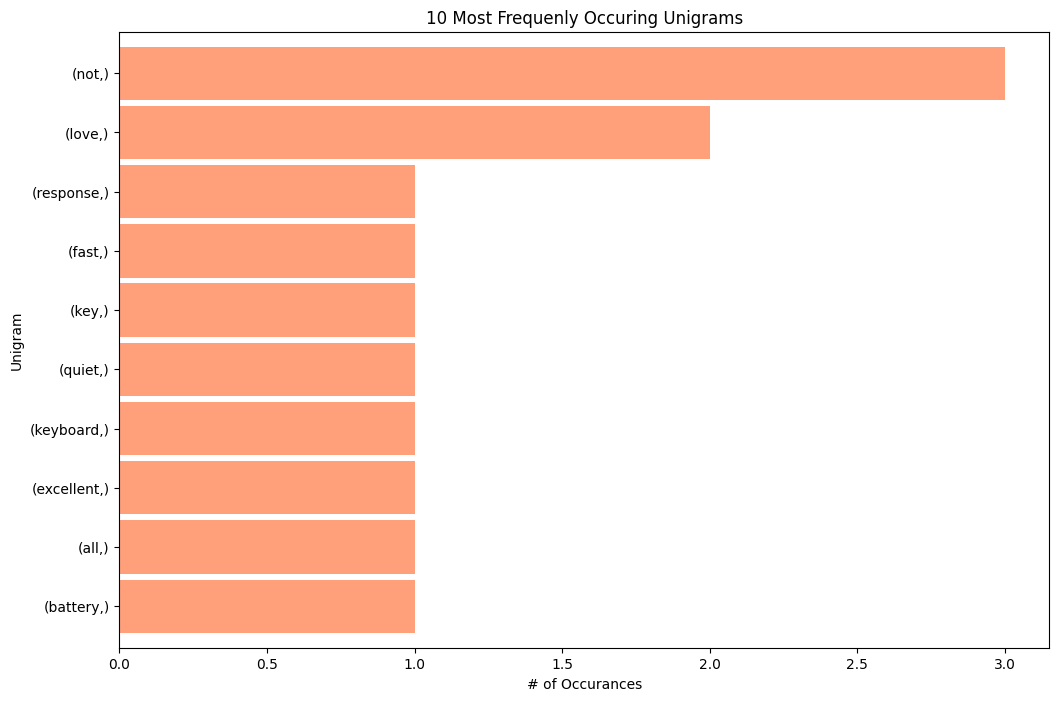

In [135]:
unigrams[:10].sort_values().plot.barh(color="lightsalmon", width=.9, figsize=(12,8))
plt.title('10 Most Frequenly Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [136]:
bigrams = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts())
print(bigrams)
bigrams_df = bigrams.reset_index()
bigrams_df.columns = ['bigram', 'count']
bigrams_df.head()

(battery, life)       1
(2m, excellent)       1
(keyboard, quiet)     1
(quiet, key)          1
(key, fast)           1
                     ..
(terrible, pretty)    1
(pretty, good)        1
(good, overall)       1
(overall, cable)      1
(special, tbh)        1
Name: count, Length: 61, dtype: int64


,bigram,count
0,"(battery, life)",1
1,"(2m, excellent)",1
2,"(keyboard, quiet)",1
3,"(quiet, key)",1
4,"(key, fast)",1


Text(0.5, 0, '# of Occurances')

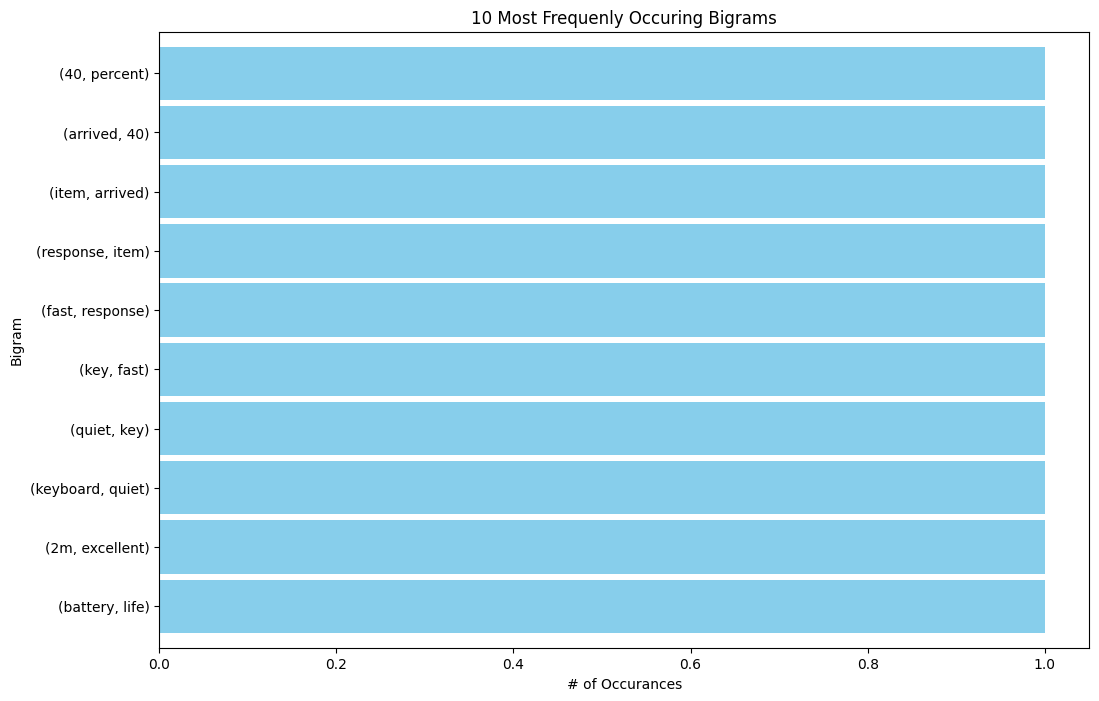

In [140]:
bigrams[:10].sort_values().plot.barh(color="skyblue", width=.9, figsize=(12,8))
plt.title('10 Most Frequenly Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')